f:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KeyError: 'date'

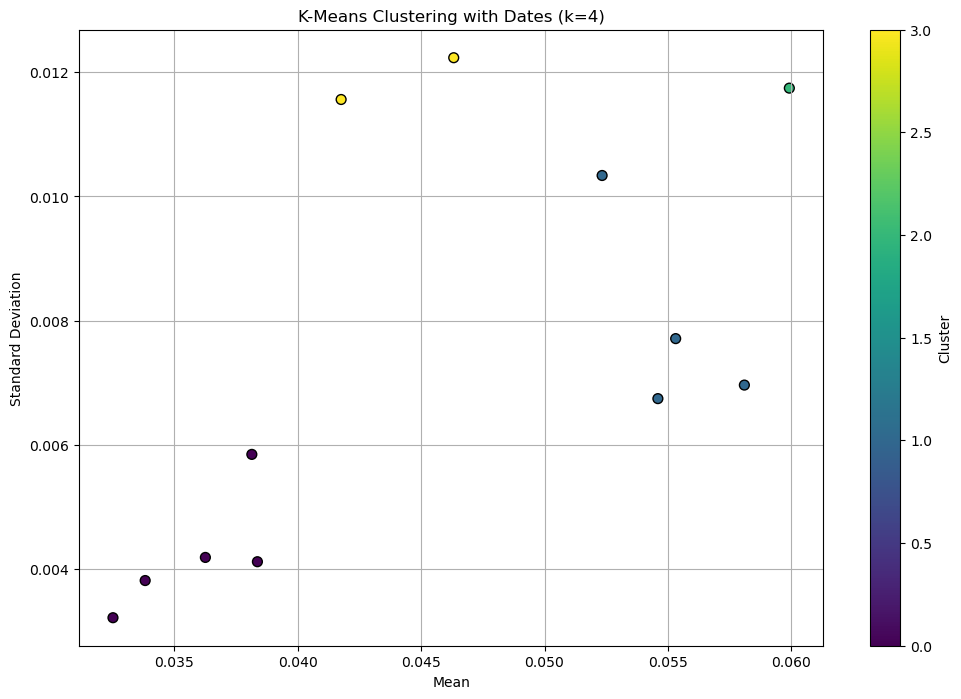

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
file_path = 'C:/Users/Windows/Desktop/Winter_wheat__result/VH_Coherence_Ascending_monthly.xlsx'  # Update the path if needed
data = pd.read_excel(file_path)

# Selecting the relevant features for clustering
features = data[['mean_value', 'std_dev_mean']]

# Applying k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
labels = kmeans.labels_

# Plotting the clusters with dates annotated
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['mean_value'], data['std_dev_mean'], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering with Dates (k=4)')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)

# Annotating each point with its corresponding date
for i in range(data.shape[0]):
    plt.annotate(data['date'].dt.strftime('%Y-%m-%d').iloc[i], (data['mean_value'].iloc[i], data['std_dev_mean'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.show()


f:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: x and y must be the same size

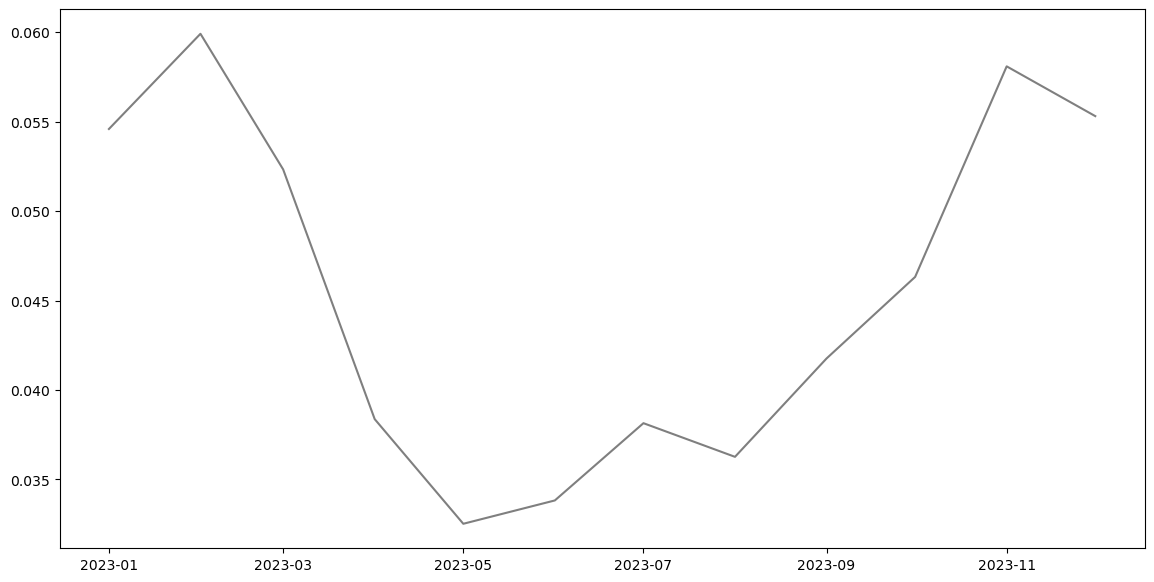

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 加载数据
file_path = 'C:/Users/Windows/Desktop/Winter_wheat__result/VH_Coherence_Ascending_monthly.xlsx'
data = pd.read_excel(file_path)

# 转换日期格式
data['year_month'] = pd.to_datetime(data['year_month'])

# 准备聚类的数据
clustering_data = data[['mean_value']]  # 假设mean_value是我们需要聚类的列

# 应用K-Means聚类算法，聚类中心数量为4
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(clustering_data)

# 对数据按日期排序
sorted_data = data.sort_values('year_month')

# 设置绘图
plt.figure(figsize=(14, 7))
colors = ['red', 'green', 'blue', 'purple']  # 聚类颜色

# 画所有数据点的连线
plt.plot(sorted_data['year_month'], sorted_data['mean_value'], color='black', linestyle='-', alpha=0.5, label='All Data')

i = 0

# 画每个聚类的散点，并加上日期标签
for cluster in sorted(data['cluster'].unique()):
    i = i + 1
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(i, cluster_data['mean_value'], color=colors[cluster], label=f'Cluster {cluster}')
    for idx, row in cluster_data.iterrows():
        plt.text(row['year_month'], row['mean_value'], row['year_month'].strftime('%Y-%m-%d'), fontsize=9)

plt.title('NDVI/GNDVI Means Over Time with Single Connecting Line and Cluster Colors')
plt.xlabel('Year Month')
plt.ylabel('Mean Value (NDVI/GNDVI)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
